In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [43]:
rect_shape = (10, 15)
bg_shape = (100, 100)
bg = np.uint8(np.zeros(bg_shape))

num_rect = 30

pos_x = np.random.randint(1, bg_shape[1]-rect_shape[1], (num_rect, ))
pos_y = np.random.randint(1, bg_shape[0]-rect_shape[0], (num_rect, ))
score = np.random.rand(num_rect)

ind = np.lexsort((score, ))
info = np.array([pos_x[ind], pos_y[ind], score[ind]]).T

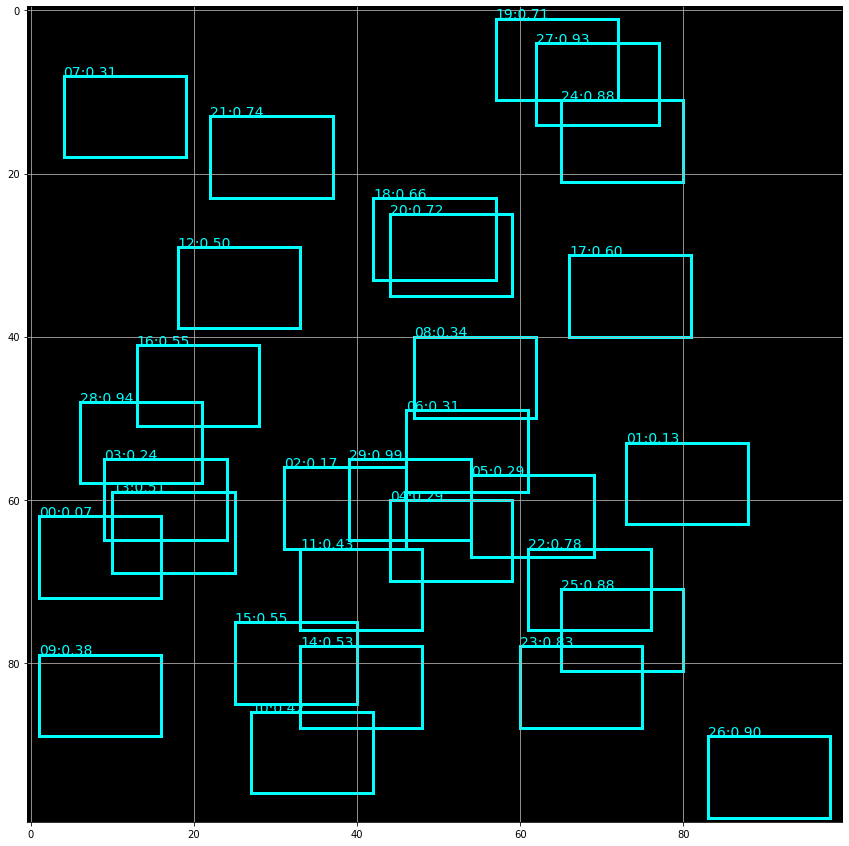

In [44]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)

ax.imshow(bg, cmap='gray')
for i, (x, y, sc) in enumerate(info):
    ax.add_patch(patches.Rectangle((x, y), *rect_shape[::-1], edgecolor='cyan', fill=False, linewidth=3))
    ax.text(x, y, f'{i:02d}:{sc:.2f}', color='cyan', fontsize=14)
ax.grid()
plt.show()

In [47]:
def non_max_suppression_fast(boxes, score, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(score)
	# keep looping while some indexes still remain in the indexes
	# list
	tmp = 1
	while len(idxs) > 0:
		print(f'>>>step {tmp}')
		print(idxs)
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		print(f'i = {i}')
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		print(f'overlap with {i}: {np.round(overlap, 2)}')
		print(f'overlap with {i}: {idxs[np.where(overlap!=0)]}')
		# delete all indexes from the index list that have
		print(f'Delete index : {np.concatenate(([last], np.where(overlap > overlapThresh)[0]))}')
		print(f'Delete things : {idxs[np.concatenate(([last], np.where(overlap > overlapThresh)[0]))]}')
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
		tmp += 1
	return boxes[pick].astype("int")
 

boxes = np.array([info[:,0], info[:,1], info[:,0]+rect_shape[1], info[:,1]+rect_shape[0]]).T

boxes2 = non_max_suppression_fast(boxes, info[:,2], 0.01)

>>>step 1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
i = 29
overlap with 29: [0.   0.   0.45 0.   0.38 0.05 0.26 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]
overlap with 29: [2 4 5 6]
Delete index : [29  2  4  5  6]
Delete things : [29  2  4  5  6]
>>>step 2
[ 0  1  3  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28]
i = 28
overlap with 28: [0.  0.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0. ]
overlap with 28: [ 3 16]
Delete index : [24  2 12]
Delete things : [28  3 16]
>>>step 3
[ 0  1  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27]
i = 27
overlap with 27: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.
 0.3 0.  0. ]
overlap with 27: [19 24]
Delete index : [21 13 18]
Delete things : [27 19 24]
>>>step 4
[ 0  1  7  8  9 10 11 12 13 14 15 17 18 20 21 22 23 25 26]
i = 26
overla

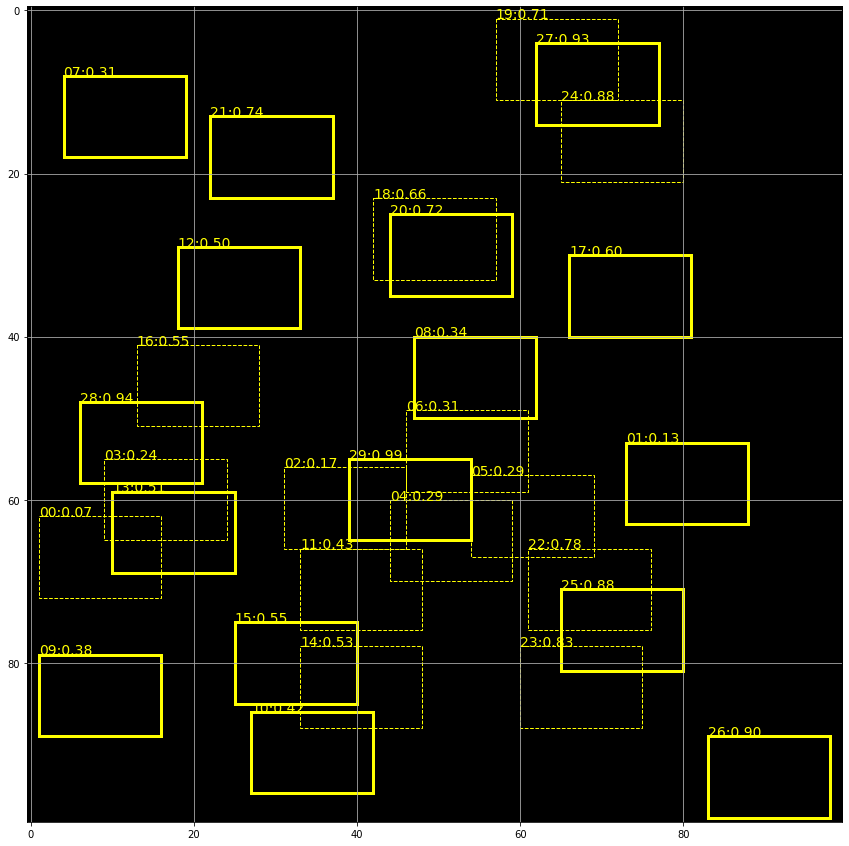

In [48]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)

ax.imshow(bg, cmap='gray')
for i, (x, y, _, _) in enumerate(boxes):
    ax.add_patch(patches.Rectangle((x, y), *rect_shape[::-1], edgecolor='yellow', fill=False, linewidth=1, linestyle='--'))
    ax.text(x, y, f'{i:02d}:{info[i,2]:.2f}', color='yellow', fontsize=14)

for i, (x, y, _, _) in enumerate(boxes2):
    ax.add_patch(patches.Rectangle((x, y), *rect_shape[::-1], edgecolor='yellow', fill=False, linewidth=3, linestyle='-'))
    
ax.grid()
plt.show()